## DayChart.py module

In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import time

from TickerDict import tickers

import dataprocessing

from pykiwoom.kiwoom import *
kiwoom = Kiwoom()

kiwoom.CommConnect(block=True)
print("블록킹 로그인 완료")

블록킹 로그인 완료


In [2]:
sss = dataprocessing.StockDataProcessor(kiwoom)

df = sss.get_stock_data('현대힘스','20250123')

df = sss.preprocess_data(df)

{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}
{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}


In [4]:
df = sss.add_moving_averages(df)

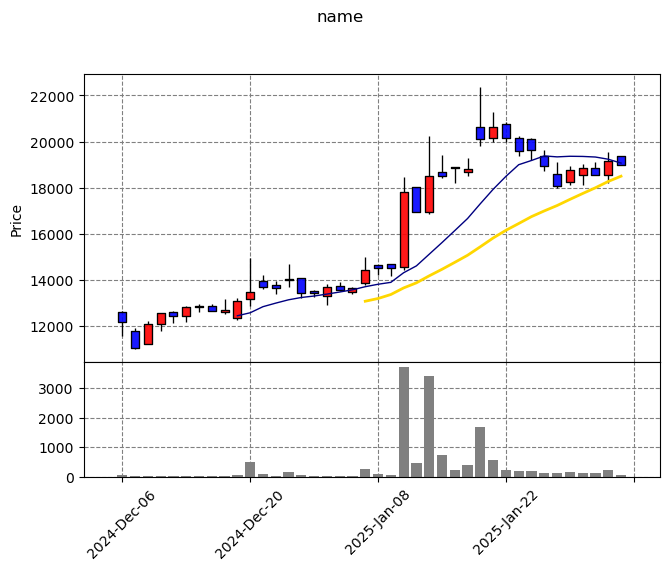

In [5]:
sss.plot_candlestick(df)

In [11]:
df.head()

,Open,High,Low,Close,Change,ChangeRate,Volume,TradingValue,Program,ForeignNetBuy,InstitutionNetBuy,IndividualNetBuy,10DMA,20DMA
datetime,,,,,,,,,,,,,,
2024-11-27,15040,15500,14330,14440,-750,-4.94,678688,101.88,-524,-34227,-31,548,NaN,NaN
2024-11-28,14310,15890,14140,14630,190,1.32,2332620,356.37,343,19242,1,-271,NaN,NaN
2024-11-29,14630,14840,14220,14310,-320,-2.19,343664,49.47,-376,-25924,-1,311,NaN,NaN
2024-12-02,14370,14640,13260,13330,-980,-6.85,499515,68.63,61,-1931,2,8,NaN,NaN
2024-12-03,13210,13810,13200,13710,380,2.85,309442,41.92,749,55426,0,-782,NaN,NaN


### 체결량TR 요청

In [5]:
df = kiwoom.block_request("opt10086",
                          종목코드='460930',
                          기준일자='20250123',
                          표시구분=1,
                          output="일별주가요청",
                          next=1)
df

{'trcode': 'opt10086', 'input': [{'일별주가요청': ['종목코드', '조회일자', '표시구분']}], 'output': [{'일별주가': ['날짜', '시가', '고가', '저가', '종가', '전일비', '등락률', '거래량', '금액(백만)', '신용비', '개인', '기관', '외인수량', '외국계', '프로그램', '외인비', '외인보유', '외인비중', '외인순매수', '기관순매수', '개인순매수', '신용잔고율']}]}


,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(백만),신용비,...,외인수량,외국계,프로그램,외인비,외인보유,외인비중,외인순매수,기관순매수,개인순매수,신용잔고율
0,20250124,+20100,+20150,-19210,+19630,+50,+0.26,1080092,21175,3.01,...,--61342,--62,--1221,+0.40,+0.40,+0.40,--61342,+7,+1430,3.01
1,20250123,20150,+20250,-19380,-19580,-570,-2.83,1068864,21013,2.94,...,+91996,+704,+1797,+0.57,+0.57,+0.57,+91996,+67,--1885,2.94
2,20250122,+20750,+20850,-20000,-20150,-500,-2.42,1196511,24384,2.88,...,--24295,--247,--492,+0.31,+0.31,+0.31,--24295,--4,+507,2.88
3,20250121,+20150,+21300,-19960,+20650,+550,+2.74,2750952,56768,2.67,...,+26086,+198,+503,+0.38,+0.38,+0.38,+26086,--15,--514,2.67
4,20250120,+20650,+22350,+19820,+20100,+1290,+6.86,7974403,168408,2.76,...,+24751,+335,+386,+0.31,+0.31,+0.31,+24751,--65,--205,2.76
5,20250117,-18660,+19300,-18510,-18810,-90,-0.48,2034230,38974,2.61,...,+7424,+29,+131,+0.24,+0.24,+0.24,+7424,+79,--9,2.61
6,20250116,+18860,+18900,-18200,+18900,+410,+2.22,1255764,23310,2.44,...,--6900,--18,--145,+0.22,+0.22,+0.22,--6900,+13,+153,2.44
7,20250115,+18670,+19430,-18400,18490,0,0.00,3884488,73462,2.47,...,--105437,--1819,--2126,+0.24,+0.24,+0.24,--105437,--20,+1725,2.47
8,20250114,-16940,+20250,-16850,+18490,+1530,+9.02,17955440,341744,2.14,...,+109466,+1991,+1893,+0.54,+0.54,+0.54,+109466,+13,--1750,2.14
9,20250113,+18020,+18020,-16960,-16960,-840,-4.72,2785962,48440,1.46,...,--126328,--2135,--2280,+0.23,+0.23,+0.23,--126328,--6,+2276,1.46


In [10]:
df = kiwoom.block_request("opt10003",
                          종목코드='460930',
                          output="요청",
                          next=1)
df.dtypes

{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}


시간          object
현재가         object
전일대비        object
대비율         object
우선매도호가단위    object
우선매수호가단위    object
체결거래량       object
sign        object
누적거래량       object
누적거래대금      object
체결강도        object
dtype: object

In [10]:
import pandas as pd
import time

def execution(stock_name, max_requests=5000, stop_time="155000"):
    """
    Fetch stock data for a given stock name and stop when the '시간' column contains a value earlier than the stop_time.
    """
    code = tickers.get(stock_name, None)  # Use tickers dictionary
    if not code:
        raise ValueError(f"Stock name '{stock_name}' not found in tickers.")

    dfs = []
    for request_num in range(max_requests):
        # Determine next_flag (1 for first request, 2 for subsequent requests)
        next_flag = 1 if request_num == 0 else 2
        
        # Fetch data from the API
        df = kiwoom.block_request(
            "opt10003",
            종목코드=code,
            output="일별주가요청",
            next=next_flag
        )
        dfs.append(df)

        # Combine all the DataFrames to check the full result
        combined_df = pd.concat(dfs, ignore_index=True)

        # Check if the stop condition is met
        if (combined_df["시간"].astype(str) < stop_time).any():  # Ensure "시간" column is treated as string
            break

        time.sleep(1)  # Respect rate limits (adjust if necessary)
    print(request_num)
    # Return the combined DataFrame
    return combined_df


In [ ]:
df2 = execution('대영포장',stop_time='090000')

{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선매수호가단위', '체결거래량', 'sign', '누적거래량', '누적거래대금', '체결강도']}]}
{'trcode': 'opt10003', 'input': [{'체결정보요청': ['종목코드']}], 'output': [{'체결정보': ['시간', '현재가', '전일대비', '대비율', '우선매도호가단위', '우선

In [ ]:
df2

In [5]:
df['시간'].astype(str)

0       155807
1       155519
2       155511
3       155056
4       155021
         ...  
5965    105901
5966    105858
5967    105857
5968    105855
5969    105853
Name: 시간, Length: 5970, dtype: object